In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pooch
from IPython.display import display, HTML
import plotly.express as px
import matplotlib.pyplot as plt
import os

In [2]:
import sys
sys.path.append('../') 
from utils.majorghg_modA import *
from utils.majorghg_modB_whRF import * 
from utils.majorghg_extra_analy import *

 for SSP scn, only enter number e.g., 119, 585 without SSP 
 for metric_toget, fetch only IRF if rolling_Y approach 
 MYs should match MY defined for FaIR


### read in RE/alpha/concentration, prepared from "v2.0.1" notebook 

In [3]:
filename = "ch4_n2o_alpha_perMY.xlsx"
re_file = os.path.join("output/RollY", filename)
alf_df = pd.read_excel(re_file )
alf_df

,SSP,MY,alpha_ch4,alpha_n2o
0,ssp119,2025,11.199661,102.781299
1,ssp119,2026,11.276409,102.593138
2,ssp119,2027,11.344275,102.413259
3,ssp119,2028,11.400994,102.241544
4,ssp119,2029,11.450459,102.077878
...,...,...,...,...
395,ssp585,2120,10.185887,87.796694
396,ssp585,2121,10.135794,87.737297
397,ssp585,2122,10.084533,87.679097
398,ssp585,2123,10.032012,87.622077


In [4]:
filename = "majorghg_erf_perMY.xlsx"
re_file = os.path.join("output/RollY", filename)
re_df = pd.read_excel(re_file ) 
re_df

,SSP,MY,co2_erf_1ppm,ch4_erf_1ppb,n2o_erf_1ppb
0,ssp119,2025,0.015512,0.000438,0.003401
1,ssp119,2026,0.015121,0.000374,0.003514
2,ssp119,2027,0.015801,0.000347,0.002494
3,ssp119,2028,0.014798,0.000479,0.002999
4,ssp119,2029,0.014907,0.000426,0.003396
...,...,...,...,...,...
395,ssp585,2120,0.005552,0.000424,0.002650
396,ssp585,2121,0.004927,0.000352,0.002749
397,ssp585,2122,0.005098,0.000386,0.003034
398,ssp585,2123,0.004623,0.000359,0.002469


In [5]:
filename = "majorghg_C_perMY.xlsx"
c_file = os.path.join("output/RollY", filename)
c_df = pd.read_excel(c_file ) 
c_df

,SSP,MY,co2_concentration,ch4_concentration,n2o_concentration
0,ssp119,2025,278.100333,729.200000,270.100000
1,ssp119,2026,281.364285,825.736408,271.314303
2,ssp119,2027,284.004997,912.714075,272.532667
3,ssp119,2028,286.506135,994.292614,273.774199
4,ssp119,2029,288.918566,1069.389034,275.018022
...,...,...,...,...,...
395,ssp585,2120,852.373135,2573.756524,367.858505
396,ssp585,2121,863.448637,2561.542353,368.418020
397,ssp585,2122,874.469148,2549.220472,368.963758
398,ssp585,2123,885.460453,2536.811917,369.495887


### plot RE , alpha

#### when we change to a rolling-year, or more specifically, a dynamic-ModelYear approach (meaning, each year serves as the new reference year, where we fetch only Year[0] FaIR output) the RE becomes a zigzag pattern, does this strange pattern raise a red-flag and not valid approach? 

In [6]:
rrr36 = rolling_Y_analysis (len_cf = 100, MYs = 2000 + np.arange(25,25+100,1)) 

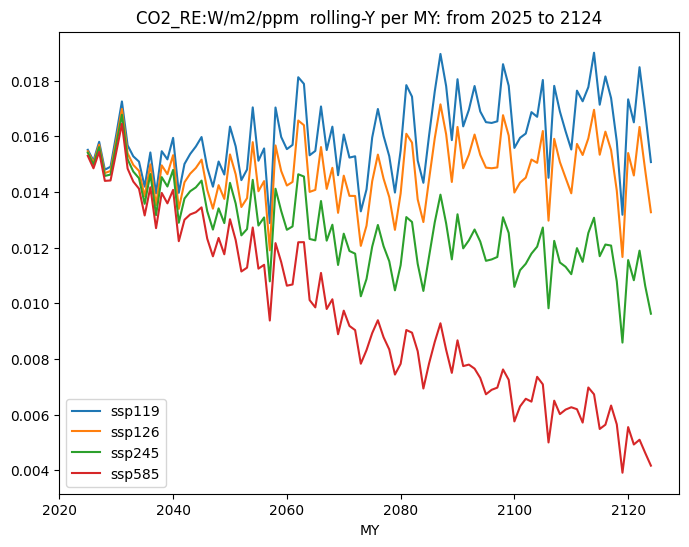

In [7]:
rrr36.plot_gas_RE_whichgas(re_df, 'CO2')

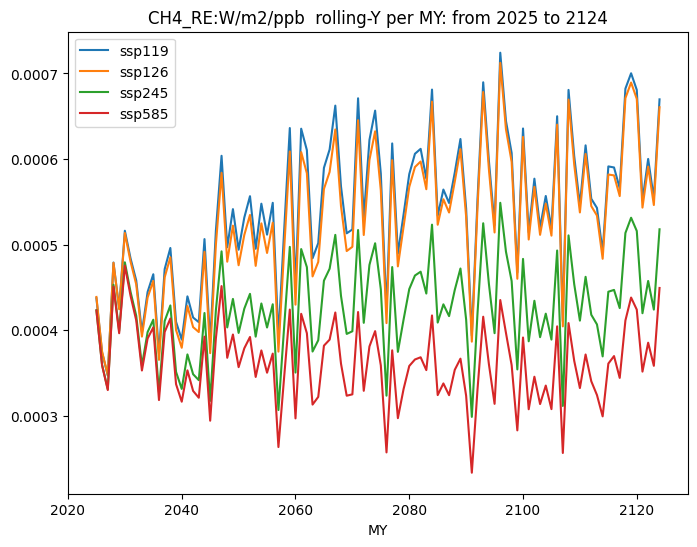

In [8]:
rrr36.plot_gas_RE_whichgas(re_df, 'CH4') 

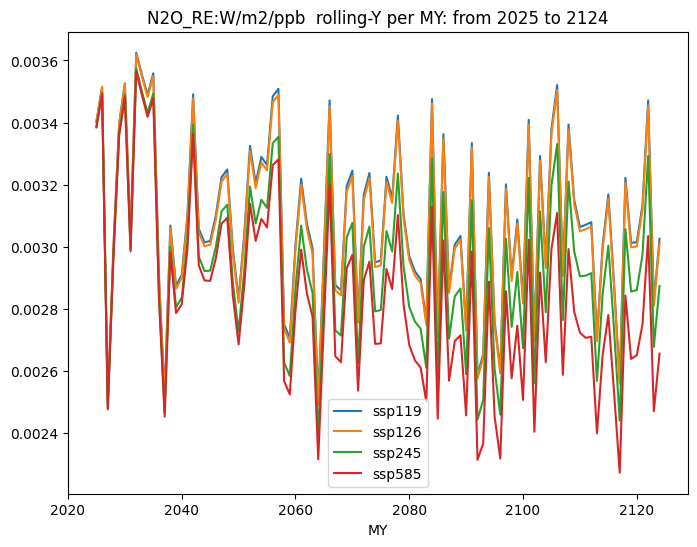

In [9]:
rrr36.plot_gas_RE_whichgas(re_df, 'N2O')

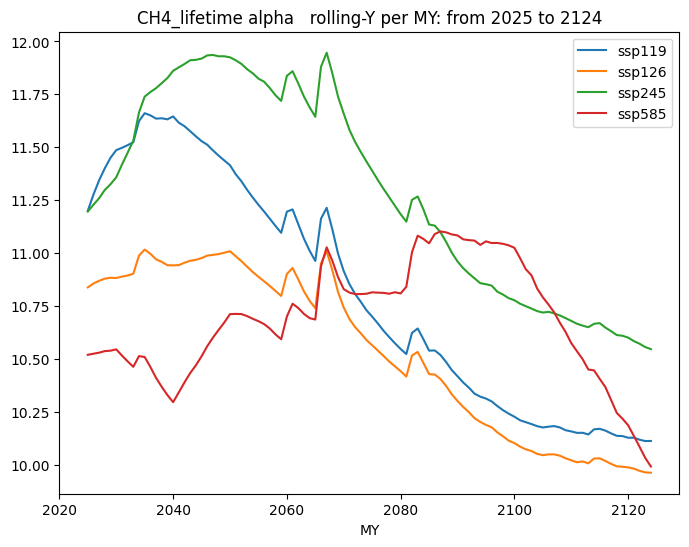

In [10]:
rrr36.plot_gas_alpha_whichgas(alf_df, 'CH4') 

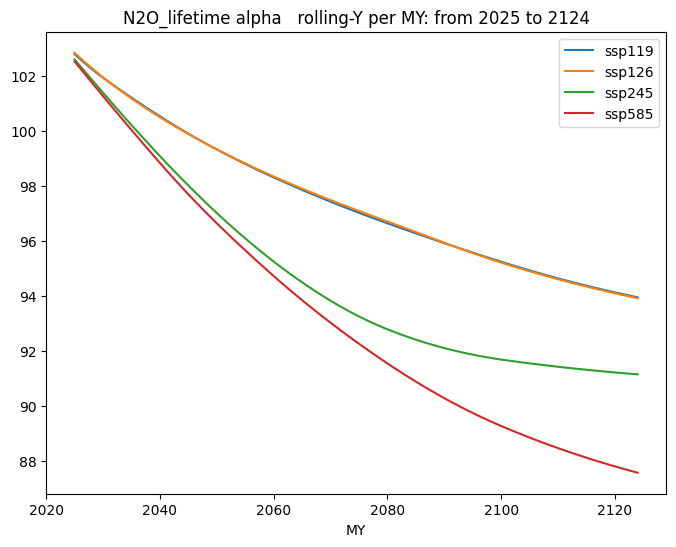

In [11]:
rrr36.plot_gas_alpha_whichgas(alf_df, 'N2O') 

### plot concentration 

this concentration serves as the "dynamic baseline concentration" when calculating the dynamic-ERF, in get_co2_meinshausen2020() function from ModuleA:  co2_base = self.co2_f["CO2_RF"]   
'CO2_RF' is the reference concentration, should re-name it as a bit confusing now with radiative forcing

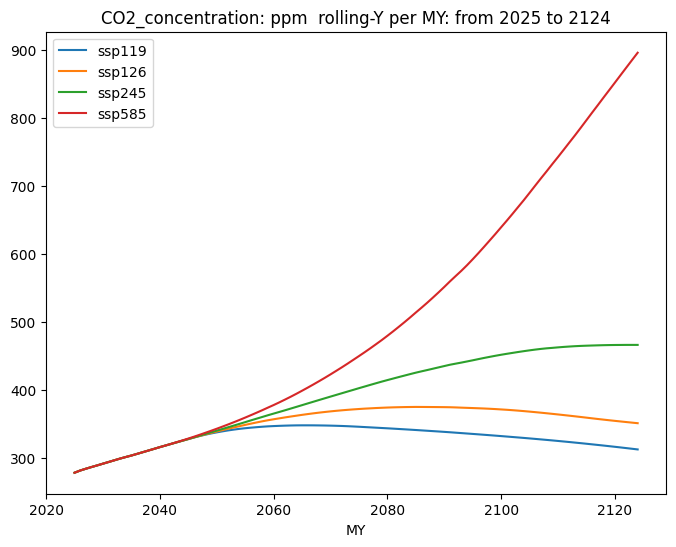

In [12]:
rrr36.plot_gas_concentration_whichgas(c_df, 'CO2') 

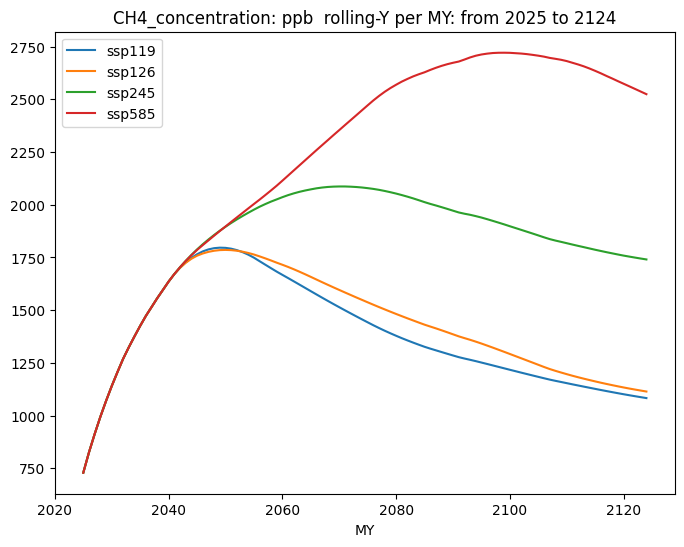

In [13]:
rrr36.plot_gas_concentration_whichgas(c_df, 'CH4') 

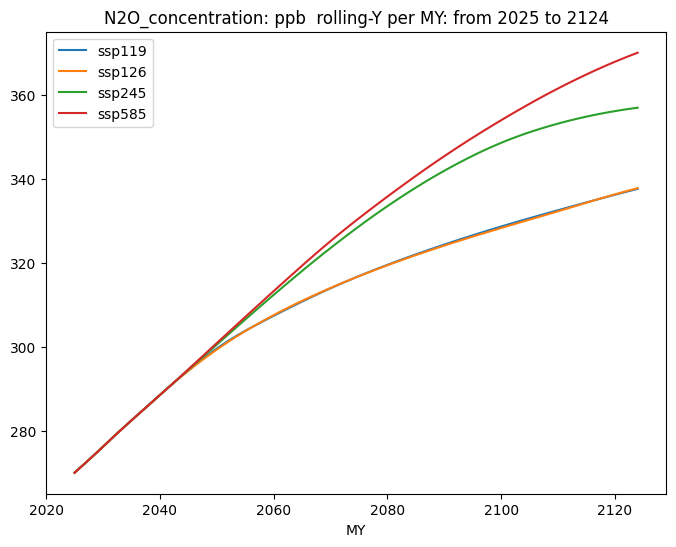

In [14]:
rrr36.plot_gas_concentration_whichgas(c_df, 'N2O') 